<a href="https://colab.research.google.com/github/sohiniroych/Knowledge-transfer-for-ML/blob/main/Reusing_Classifiers_batchwise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This codebook applies knowledge transfer across batches of data sets for classification using Random Forest Classifers using the "warm start" feature

In [ ]:
# Step 1: Load the digits data set
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

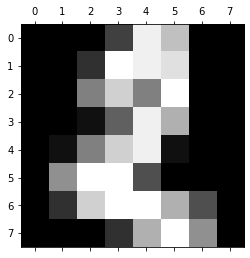

In [ ]:
#Lets visualize the data
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[2]) 
plt.show() 

In [ ]:
print(digits.target.shape)

(1797,)


In [ ]:
# Now we divide the data to train and test split, 80/20 split with random seed 42
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [ ]:
# Lets see how many samples are in train and test sets
print(X_train.shape, X_test.shape)

(1437, 64) (360, 64)


In [ ]:
# Our intention is to train classifiers in batches and observe how test accuracy improves by aggregating across data sets
# we start with 500 samples from training set each
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_1=RandomForestClassifier(max_depth=20, n_estimators=20, random_state=42, warm_start=True)
model_1.fit(X_train[:500,:],y_train[:500])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [ ]:
pred_1=model_1.predict(X_test)
print("Test accuracy=", metrics.accuracy_score(y_test,pred_1))

0.9583333333333334


In [ ]:
# Next build addiitonal 50 estimators with next batch of data
model_1.set_params(n_estimators=50)
model_1.fit(X_train[500:1000,:],y_train[500:1000]) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [ ]:
pred_2=model_1.predict(X_test)
print("Test accuracy=", metrics.accuracy_score(y_test,pred_2))

0.9638888888888889


In [ ]:
# Now repeat the process a third time to see imporvements
model_1.set_params(n_estimators=80)
model_1.fit(X_train[1000:,:],y_train[1000:]) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [ ]:
pred_3=model_1.predict(X_test)
print("Test accuracy=", metrics.accuracy_score(y_test,pred_3))

0.9666666666666667


In [ ]:
# Sample principle applied for Gradient Boosting (for biased samples)